In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel(r'D:\Users\DELL\TSf taskssss\Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
import seaborn as sns

In [8]:
sns.set()

In [9]:
train_data.shape

(10683, 11)

In [10]:
train_data.duplicated().sum()

220

In [11]:
 train_data.duplicated().value_counts()

False    10463
True       220
dtype: int64

<AxesSubplot:>

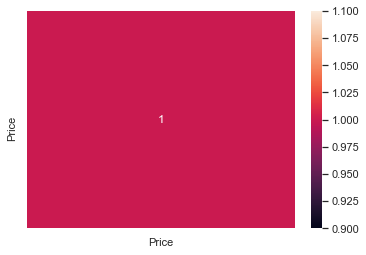

In [12]:
sns.heatmap(train_data.corr(),annot=True)

In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
train_data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [15]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [16]:
train_data['Duration'].isna().sum()

0

In [17]:
train_data.dropna(inplace=True)

In [18]:
train_data.shape

(10682, 11)

In [19]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#  EDA

In [20]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [21]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [22]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9.0,4.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27.0,4.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27.0,4.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1.0,3.0


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  int64  
 11  Journey_day      10341 non-null  float64
 12  Journey_month    10341 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [24]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [25]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9.0,4.0
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27.0,4.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27.0,4.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1.0,3.0


In [26]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [27]:
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [28]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [29]:
train_data['Dep_hour']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hour, Length: 10682, dtype: int64

In [30]:
train_data['Dep_min']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10682, dtype: int64

In [31]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [32]:
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [33]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24.0,3.0,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1.0,5.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9.0,6.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12.0,5.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1.0,3.0,16,50,21,35


In [35]:
#converting duration
#difference between Departure Time and Arrival Time

In [36]:
duration = list(train_data['Duration'])

In [37]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        #checks if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) #extracts hours
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [38]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [39]:
duration_hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [40]:
duration_mins

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [41]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [42]:
"2h 50m".split()

['2h', '50m']

In [43]:
len("2h 50m".split())

2

In [44]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24.0,3.0,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1.0,5.0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9.0,6.0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12.0,5.0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1.0,3.0,16,50,21,35,4,45


In [45]:
train_data.drop(['Duration'],axis=1,inplace=True)

#  Handling categorical columns

In [46]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

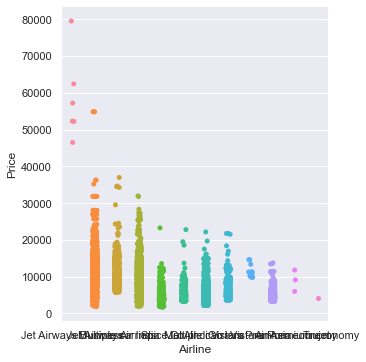

In [47]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="strip") 
plt.show()

In [48]:
#one hot encoding

In [49]:
Airline = train_data[['Airline']]

In [50]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [51]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [52]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

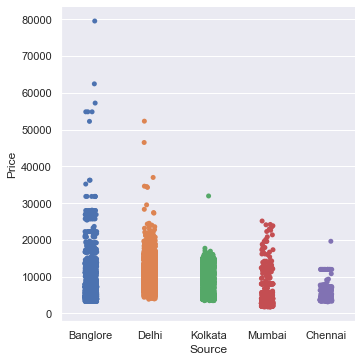

In [53]:
sns.catplot(y="Price",x="Source",data = train_data.sort_values("Price",ascending=False),kind="strip")

In [54]:
Source = train_data[['Source']]

In [55]:
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [56]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24.0,3.0,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1.0,5.0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9.0,6.0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12.0,5.0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1.0,3.0,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9.0,4.0,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27.0,4.0,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27.0,4.0,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1.0,3.0,11,30,14,10,2,40


In [57]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [58]:
Destination = train_data[['Destination']]

In [59]:
Destination = pd.get_dummies(Destination,drop_first=True)

In [60]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [61]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [62]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
train_data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [64]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [65]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [66]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24.0,3.0,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1.0,5.0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9.0,6.0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12.0,5.0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1.0,3.0,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9.0,4.0,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27.0,4.0,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27.0,4.0,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1.0,3.0,11,30,14,10,2,40


In [67]:
train_data['Journey_day'].isna().sum()

341

In [68]:
train_data.isna().any()

Airline           False
Source            False
Destination       False
Total_Stops       False
Price             False
Journey_day        True
Journey_month      True
Dep_hour          False
Dep_min           False
Arrival_hour      False
Arrival_min       False
Duration_hours    False
Duration_mins     False
dtype: bool

In [69]:
train_data.dropna(inplace=True)

In [70]:
train_data.replace({'non-stop':0,
                   "1 stop":1,
                   "2 stops":2,
                   "3 stops":3,
                   "4 stops":4},inplace=True)

In [71]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24.0,3.0,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1.0,5.0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9.0,6.0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12.0,5.0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1.0,3.0,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9.0,4.0,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27.0,4.0,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27.0,4.0,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1.0,3.0,11,30,14,10,2,40


In [72]:
train_data.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.616242,-0.020156,0.042669,-0.058732,-0.003689,0.035600,-0.106749,0.740177,-0.126450
Price,0.616242,1.000000,-0.142584,-0.084579,0.011355,-0.030669,0.025258,-0.086690,0.516265,-0.120338
Journey_day,-0.020156,-0.142584,1.000000,-0.089623,-0.000966,-0.003687,-0.005165,-0.013606,-0.028712,-0.000866
Journey_month,0.042669,-0.084579,-0.089623,1.000000,0.037099,-0.053950,-0.007108,-0.100030,0.009709,-0.029052
Dep_hour,-0.058732,0.011355,-0.000966,0.037099,1.000000,-0.022182,0.002647,0.070345,0.008027,-0.028426
Dep_min,-0.003689,-0.030669,-0.003687,-0.053950,-0.022182,1.000000,0.043912,-0.017784,-0.024778,0.094200
Arrival_hour,0.035600,0.025258,-0.005165,-0.007108,0.002647,0.043912,1.000000,-0.162482,0.057333,-0.121131
Arrival_min,-0.106749,-0.086690,-0.013606,-0.100030,0.070345,-0.017784,-0.162482,1.000000,-0.071932,0.151526
Duration_hours,0.740177,0.516265,-0.028712,0.009709,0.008027,-0.024778,0.057333,-0.071932,1.000000,-0.118155
Duration_mins,-0.126450,-0.120338,-0.000866,-0.029052,-0.028426,0.094200,-0.121131,0.151526,-0.118155,1.000000


In [73]:
data_train = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [74]:
data_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107.0,9.0,4.0,19.0,55.0,22.0,25.0,2.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0.0,4145.0,27.0,4.0,20.0,45.0,23.0,20.0,2.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0.0,7229.0,27.0,4.0,8.0,20.0,11.0,20.0,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0.0,12648.0,1.0,3.0,11.0,30.0,14.0,10.0,2.0,40.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [75]:
 data_train.drop(['Airline',"Source","Destination"],axis=1,inplace=True)

In [76]:
data_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107.0,9.0,4.0,19.0,55.0,22.0,25.0,2.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145.0,27.0,4.0,20.0,45.0,23.0,20.0,2.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229.0,27.0,4.0,8.0,20.0,11.0,20.0,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648.0,1.0,3.0,11.0,30.0,14.0,10.0,2.0,40.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [77]:
data_train.dropna(inplace=True)

In [78]:
data_train.shape

(10341, 30)

# Testdata

In [79]:
test_data = pd.read_excel(r'D:\Users\DELL\TSf taskssss\Test_set.xlsx')

In [80]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [81]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [82]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [83]:
# Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [84]:

data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [85]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
y = data_train.iloc[:,1]

In [87]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10341, dtype: float64

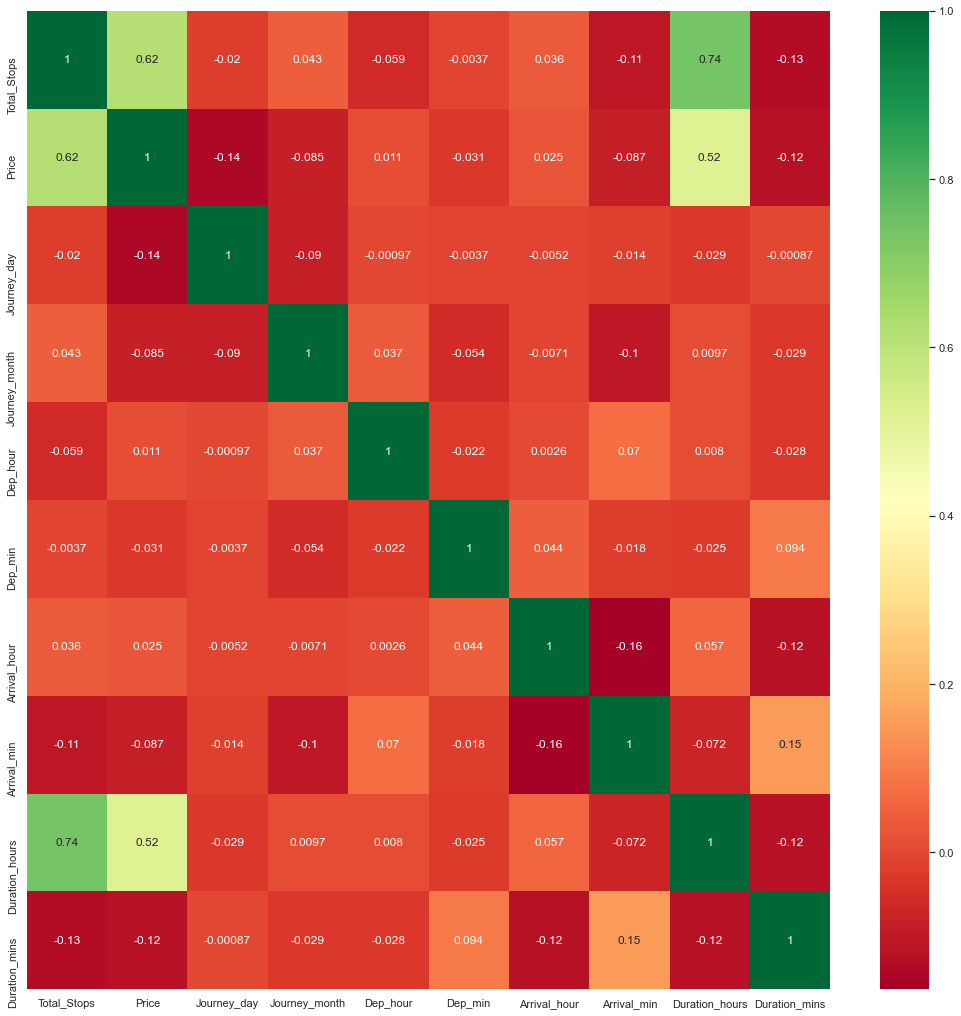

In [88]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

   # Extra tree regressor  

In [89]:

from sklearn.ensemble import ExtraTreesRegressor

In [90]:
extra = ExtraTreesRegressor()

In [91]:
X.isna().any()

Total_Stops                                  False
Journey_day                                  False
Journey_month                                False
Dep_hour                                     False
Dep_min                                      False
Arrival_hour                                 False
Arrival_min                                  False
Duration_hours                               False
Duration_mins                                False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                              False
Airline_Vistara Premium economy

In [92]:
X.dropna(inplace=True)

In [93]:
X.isna().any()

Total_Stops                                  False
Journey_day                                  False
Journey_month                                False
Dep_hour                                     False
Dep_min                                      False
Arrival_hour                                 False
Arrival_min                                  False
Duration_hours                               False
Duration_mins                                False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                              False
Airline_Vistara Premium economy

In [94]:
extra.fit(X,y)

ExtraTreesRegressor()

In [95]:
X.isna().any()

Total_Stops                                  False
Journey_day                                  False
Journey_month                                False
Dep_hour                                     False
Dep_min                                      False
Arrival_hour                                 False
Arrival_min                                  False
Duration_hours                               False
Duration_mins                                False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                              False
Airline_Vistara Premium economy

In [96]:
X.shape

(10341, 29)

In [97]:
y.shape

(10341,)

In [98]:
print(extra.feature_importances_)

[2.41054046e-01 1.31763013e-01 5.25668785e-02 2.49007658e-02
 2.14925540e-02 2.79881656e-02 1.96347666e-02 1.24107559e-01
 1.73067776e-02 9.12919396e-03 1.67319247e-03 1.63929717e-02
 1.37819435e-01 7.09845824e-02 2.07843951e-02 9.53515603e-04
 2.58899127e-03 1.03265818e-04 4.80740051e-03 9.82875605e-06
 4.13076337e-04 1.22995819e-02 4.39416752e-03 6.70583572e-03
 1.19825239e-02 1.53459247e-02 7.40257699e-03 5.48986204e-04
 1.48460277e-02]


In [100]:
from sklearn.model_selection import train_test_split as tts

In [101]:
X_train,x_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=42)

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
RFR = RandomForestRegressor()

In [104]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
y_preds = RFR.predict(x_test)

In [106]:
y_preds

array([4841.37      , 5265.31      , 9869.66      , ..., 8553.07083333,
       5530.3775    , 7261.42      ])

In [107]:
y_test

8522      4823.0
10091     5073.0
475       7378.0
3577      1965.0
10404     6117.0
          ...   
794      16704.0
1188      4957.0
8960     12681.0
8659      9564.0
8304      6723.0
Name: Price, Length: 2069, dtype: float64

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mse = mean_squared_error(y_preds,y_test)

In [110]:
mse

4450743.356631665

In [111]:
rmse = np.sqrt(mse)

In [112]:
rmse

2109.6784960348023

In [113]:
RFR.score(X_train,y_train)

0.9526416527753688

In [114]:
RFR.score(x_test,y_test)

0.79506247835359

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


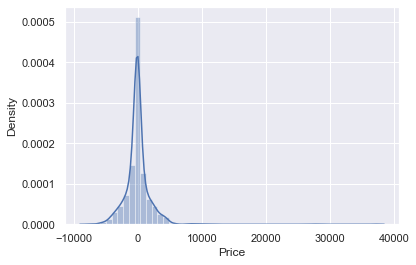

In [115]:
sns.distplot(y_test-y_preds)
plt.show()

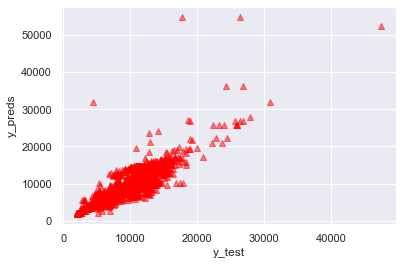

In [120]:
plt.scatter(y_preds,y_test,alpha=0.5,marker="^",color="red")
plt.xlabel("y_test")
plt.ylabel("y_preds")
plt.show()

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
#number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of features
max_features=["auto","sqrt"]
#max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [126]:
# fuck = [int(x) for x in range(1,3)]

In [127]:
# fuck

[1, 2]

In [128]:
random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [129]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [130]:
rf_random = RandomizedSearchCV(estimator=RFR,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv =5,verbose= 2,random_state=42,n_jobs=1)

In [131]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [132]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [133]:
final_predictions = rf_random.predict(x_test)

In [134]:
final_predictions

array([ 4835.89223354,  5449.90438815, 10456.44597032, ...,
        9494.57374558,  6169.41485947,  7972.6522618 ])

In [135]:
y_test

8522      4823.0
10091     5073.0
475       7378.0
3577      1965.0
10404     6117.0
          ...   
794      16704.0
1188      4957.0
8960     12681.0
8659      9564.0
8304      6723.0
Name: Price, Length: 2069, dtype: float64

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


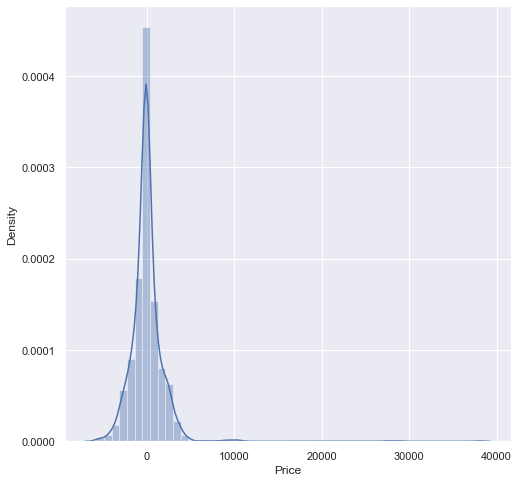

In [137]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-final_predictions)
plt.show()

No handles with labels found to put in legend.


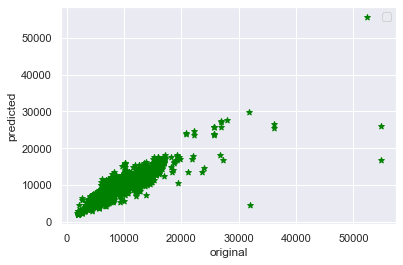

In [138]:
plt.scatter(y_test,final_predictions,color="green",marker="*")
plt.xlabel("original")
plt.ylabel("predicted")
plt.legend()
plt.show()

# Saving to pickle

In [140]:
import pickle

In [141]:
file = open("flight_rf.pkl","wb")

In [142]:
pickle.dump(reg_rf,file)

NameError: name 'reg_rf' is not defined